In [3]:
import pandas as pd
import numpy as np

import neattext as nt
import neattext.functions as nfx
import plotly.express as px

In [4]:
df = pd.read_pickle('./labeled_data.p')

df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [6]:
df = df[['tweet',"class"]]

df

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
25291,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
25292,"you've gone and broke the wrong heart baby, an...",2
25294,young buck wanna eat!!.. dat nigguh like I ain...,1
25295,youu got wild bitches tellin you lies,1


In [7]:
s = df.iloc[4]["tweet"]

In [8]:
docx = nt.TextFrame(s)

In [9]:
docx.describe()

Key      Value          
Length  : 137            
vowels  : 33             
consonants: 56             
stopwords: 15             
punctuations: 17             
special_char: 18             
tokens(whitespace): 26             
tokens(words): 27             


In [10]:
docx.head(10)

'!!!!!!!!!!'

In [11]:
s

'!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;'

In [12]:
docx.remove_stopwords(s).text

'!!!!!!!!!!!!! RT @ShenikaRoberts: shit hear true faker bitch told ya &#57361;'

In [13]:
docx.remove_puncts(most_common=False).text

' RT ShenikaRoberts shit hear true faker bitch told ya 57361'

In [14]:
df["tweet"].apply(lambda x: nt.TextFrame(x).noise_scan()["text_noise"])

0        18.571429
1        17.647059
2        20.000000
3        27.419355
4        23.357664
           ...    
25291    16.438356
25292    10.000000
25294    10.447761
25295     2.702703
25296    11.811024
Name: tweet, Length: 24783, dtype: float64

In [15]:
df["userhandles"] = df["tweet"].apply(nfx.extract_userhandles)

In [16]:
df["clean_tweet"] = df["tweet"].apply(nfx.remove_userhandles)

In [17]:
df.head()

,tweet,class,userhandles,clean_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,[@mayasolovely:],!!! RT As a woman you shouldn't complain abo...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,[@mleew17:],!!!!! RT boy dats cold...tyga dwn bad for cu...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,"[@UrKindOfBrand, @80sbaby4life:]",!!!!!!! RT Dawg!!!! RT You ever fuck a bit...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,"[@C_G_Anderson:, @viva_based]",!!!!!!!!! RT she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,[@ShenikaRoberts:],!!!!!!!!!!!!! RT The shit you hear about me ...


In [18]:
df["tweet"].apply(nfx.extract_hashtags)

0                                           []
1                                           []
2                                           []
3                                           []
4                                    [#57361;]
                         ...                  
25291    [#8220;@LifeAsKing:, #8230;., #8221;]
25292                                       []
25294                                       []
25295                                       []
25296                                       []
Name: tweet, Length: 24783, dtype: object

In [19]:
df["clean_tweet"].apply(nfx.remove_hashtags)

0        !!! RT   As a woman you shouldn't complain abo...
1        !!!!! RT   boy dats cold...tyga dwn bad for cu...
2        !!!!!!! RT   Dawg!!!! RT   You ever fuck a bit...
3                  !!!!!!!!! RT     she look like a tranny
4        !!!!!!!!!!!!! RT   The shit you hear about me ...
                               ...                        
25291    you's a muthaf***in lie &       right! His TL ...
25292    you've gone and broke the wrong heart baby, an...
25294    young buck wanna eat!!.. dat nigguh like I ain...
25295                youu got wild bitches tellin you lies
25296    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: clean_tweet, Length: 24783, dtype: object

In [20]:
df["clean_tweet"].apply(lambda x: nfx.remove_custom_pattern(x,term_pattern = r'&#\S+')) 

0        !!! RT   As a woman you shouldn't complain abo...
1        !!!!! RT   boy dats cold...tyga dwn bad for cu...
2        !!!!!!! RT   Dawg!!!! RT   You ever fuck a bit...
3                  !!!!!!!!! RT     she look like a tranny
4        !!!!!!!!!!!!! RT   The shit you hear about me ...
                               ...                        
25291    you's a muthaf***in lie        right! His TL i...
25292    you've gone and broke the wrong heart baby, an...
25294    young buck wanna eat!!.. dat nigguh like I ain...
25295                youu got wild bitches tellin you lies
25296    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: clean_tweet, Length: 24783, dtype: object

In [21]:
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: nfx.remove_custom_pattern(x,term_pattern = r'&#\S+'))

In [22]:
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: nfx.remove_custom_pattern(x,term_pattern = r'RT'))

In [23]:
df["clean_tweet"].apply(nfx.remove_special_characters)

0             As a woman you shouldnt complain about cl...
1             boy dats coldtyga dwn bad for cuffin dat ...
2             Dawg     You ever fuck a bitch and she st...
3                                   she look like a tranny
4             The shit you hear about me might be true ...
                               ...                        
25291    yous a muthafin lie        right His TL is tra...
25292    youve gone and broke the wrong heart baby and ...
25294    young buck wanna eat dat nigguh like I aint fu...
25295                youu got wild bitches tellin you lies
25296    Ruffled  Ntac Eileen Dahlia  Beautiful color c...
Name: clean_tweet, Length: 24783, dtype: object

In [24]:
df["clean_tweet"] = df["clean_tweet"].apply(nfx.remove_special_characters)

In [25]:
df["clean_tweet"] = df["clean_tweet"].apply(nfx.remove_multiple_spaces)

In [26]:
df.head()

,tweet,class,userhandles,clean_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,[@mayasolovely:],As a woman you shouldnt complain about cleani...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,[@mleew17:],boy dats coldtyga dwn bad for cuffin dat hoe ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,"[@UrKindOfBrand, @80sbaby4life:]",Dawg You ever fuck a bitch and she start to c...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,"[@C_G_Anderson:, @viva_based]",she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,[@ShenikaRoberts:],The shit you hear about me might be true or i...


In [27]:
df["clean_tweet"].apply(nfx.extract_stopwords)

0        [a, you, about, up, your, as, a, you, should, ...
1                                           [for, in, the]
2                                [a, and, she, to, be, as]
3                                                 [she, a]
4        [you, about, me, be, or, it, be, than, the, wh...
                               ...                        
25291                                         [a, is, and]
25292                                  [and, the, and, me]
25294                                          [up, again]
25295                                                [you]
25296                                                 [of]
Name: clean_tweet, Length: 24783, dtype: object

In [28]:
df["clean_tweet"].apply(nfx.remove_stopwords)

0        woman shouldnt complain cleaning house amp man...
1        boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2                  Dawg fuck bitch start cry confused shit
3                                         look like tranny
4                       shit hear true faker bitch told ya
                               ...                        
25291    yous muthafin lie right TL trash Bible scriptu...
25292    youve gone broke wrong heart baby drove rednec...
25294    young buck wanna eat dat nigguh like aint fuck...
25295                    youu got wild bitches tellin lies
25296    Ruffled Ntac Eileen Dahlia Beautiful color com...
Name: clean_tweet, Length: 24783, dtype: object

In [29]:
df["clean_tweet"].apply(lambda x: nt.TextFrame(x).remove_stopwords())

0        woman shouldnt complain cleaning house amp man...
1        boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2                  Dawg fuck bitch start cry confused shit
3                                         look like tranny
4                       shit hear true faker bitch told ya
                               ...                        
25291    yous muthafin lie right TL trash Bible scriptu...
25292    youve gone broke wrong heart baby drove rednec...
25294    young buck wanna eat dat nigguh like aint fuck...
25295                    youu got wild bitches tellin lies
25296    Ruffled Ntac Eileen Dahlia Beautiful color com...
Name: clean_tweet, Length: 24783, dtype: object

In [30]:
df["clean_tweet"].apply(lambda x: nfx.remove_stopwords(x, lang="en"))

0        woman shouldnt complain cleaning house amp man...
1        boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2                  Dawg fuck bitch start cry confused shit
3                                         look like tranny
4                       shit hear true faker bitch told ya
                               ...                        
25291    yous muthafin lie right TL trash Bible scriptu...
25292    youve gone broke wrong heart baby drove rednec...
25294    young buck wanna eat dat nigguh like aint fuck...
25295                    youu got wild bitches tellin lies
25296    Ruffled Ntac Eileen Dahlia Beautiful color com...
Name: clean_tweet, Length: 24783, dtype: object

In [31]:
df["clean_tweet"] = df["clean_tweet"].apply(nfx.remove_stopwords)

In [32]:
df["clean_tweet"].apply(lambda x: nt.TextFrame(x).noise_scan()["text_noise"])

0        0
1        0
2        0
3        0
4        0
        ..
25291    0
25292    0
25294    0
25295    0
25296    0
Name: clean_tweet, Length: 24783, dtype: int64

In [33]:
df["clean_tweet"].iloc[11]

'Murda Gang bitch Gang Land'

In [34]:
df

,tweet,class,userhandles,clean_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,[@mayasolovely:],woman shouldnt complain cleaning house amp man...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,[@mleew17:],boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,"[@UrKindOfBrand, @80sbaby4life:]",Dawg fuck bitch start cry confused shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,"[@C_G_Anderson:, @viva_based]",look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,[@ShenikaRoberts:],shit hear true faker bitch told ya
...,...,...,...,...
25291,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,"[@LifeAsKing:, @20_Pearls, @corey_emanuel]",yous muthafin lie right TL trash Bible scriptu...
25292,"you've gone and broke the wrong heart baby, an...",2,[],youve gone broke wrong heart baby drove rednec...
25294,young buck wanna eat!!.. dat nigguh like I ain...,1,[],young buck wanna eat dat nigguh like aint fuck...
25295,youu got wild bitches tellin you lies,1,[],youu got wild bitches tellin lies


### Parole più utilizzate nel dataset

<Axes: >

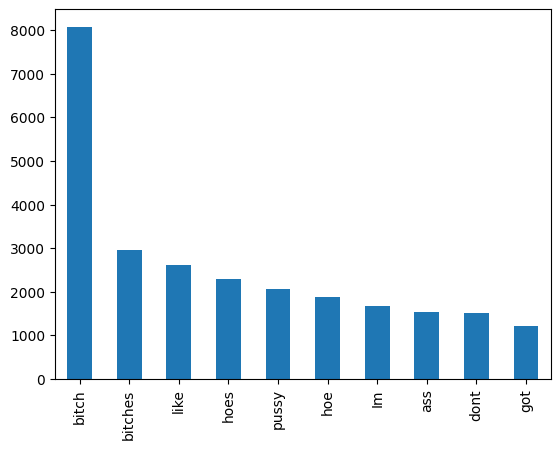

In [35]:
df.clean_tweet.str.split(expand=True).stack().value_counts().iloc[0:10].plot(kind='bar')

<Axes: >

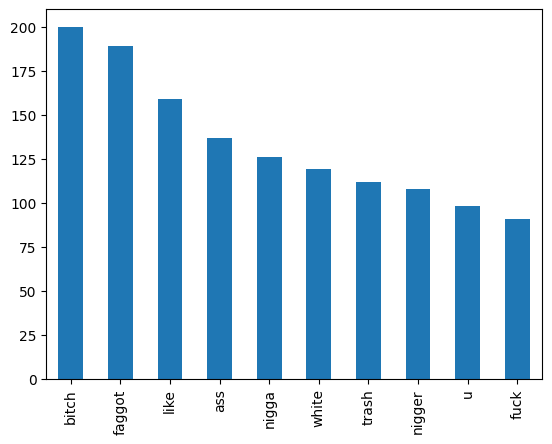

In [48]:
pd.to_numeric(df['class'])

df_class_0 = df.loc[df['class'] == 0]

df_class_0.clean_tweet.str.split(expand=True).stack().value_counts().iloc[0:10].plot(kind='bar')

<Axes: >

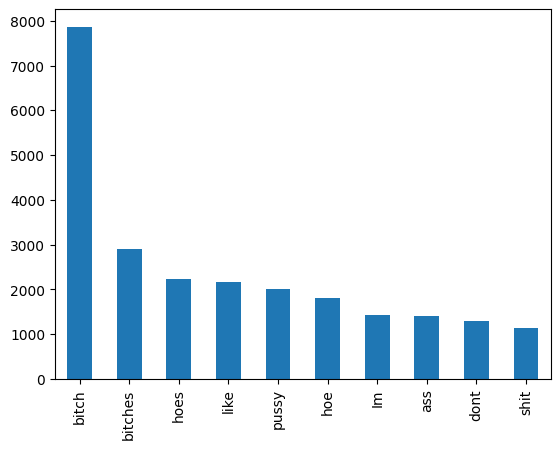

In [49]:
df_class_1 = df.loc[df['class'] == 1]

df_class_1.clean_tweet.str.split(expand=True).stack().value_counts().iloc[0:10].plot(kind='bar')

<Axes: >

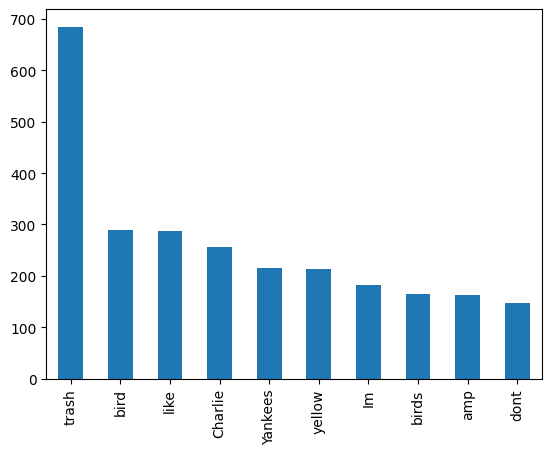

In [50]:
df_class_2 = df.loc[df['class'] == 2]

df_class_2.clean_tweet.str.split(expand=True).stack().value_counts().iloc[0:10].plot(kind='bar')